C:\Users\Revathy\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Revathy\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Revathy\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Revathy\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting t

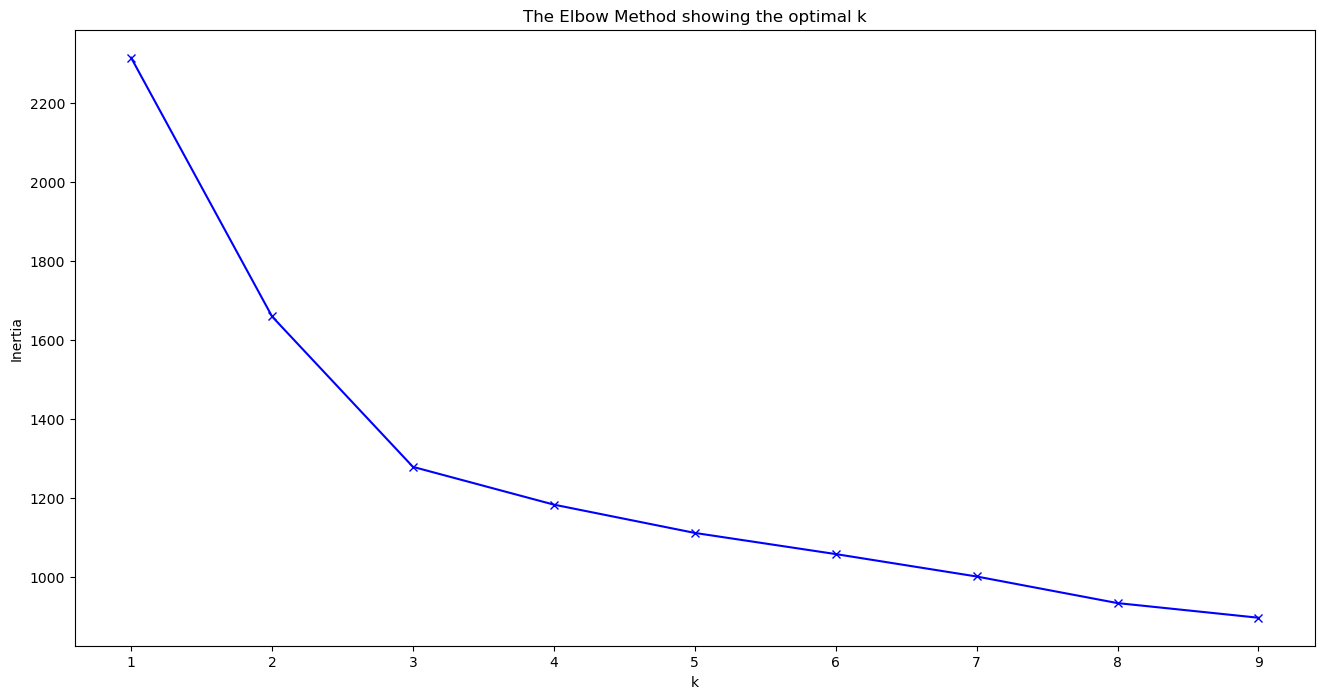

C:\Users\Revathy\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Revathy\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


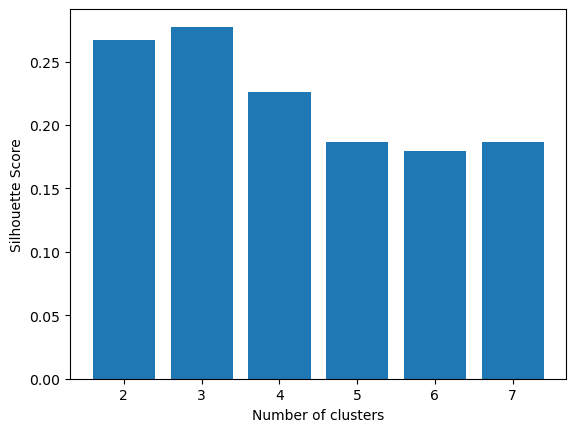

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# 1. Load the dataset
df = pd.read_excel(r"C:\Users\Revathy\Desktop\Case study 3.xlsx")

# Preprocessing
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# K-Means clustering
inertias = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    inertias.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Fit K-Means with optimum clusters
optimal_K = K[inertias.index(min(inertias))]
kmeans = KMeans(n_clusters=optimal_K)
kmeans.fit(df_scaled)
df['KMeans_cluster'] = kmeans.labels_

# Hierarchical clustering
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(df_scaled, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(df_scaled))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

# Fit AgglomerativeClustering with optimum clusters
optimal_n = k[silhouette_scores.index(max(silhouette_scores))]
agg = AgglomerativeClustering(n_clusters=optimal_n)
df['Agg_cluster'] = agg.fit_predict(df_scaled)

# DBSCAN clustering
# For DBSCAN, there's no need to specify the number of clusters.
# We need to tune two parameters: eps and min_samples
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(df_scaled)
df['DBSCAN_cluster'] = dbscan.labels_